In [1]:
library(dplyr)
library(tibble)
library(DESeq2)
library(ggplot2)
library(openxlsx)
# write.xlsx(dataframe1, file="filename.xlsx", sheetName="sheet1", row.names=FALSE)
# write.xlsx(dataframe2, file="filename.xlsx", sheetName="sheet2", append=TRUE, row.names=FALSE)
# setwd("Desktop/Neurogenomics/Projectes/CortexMalformation/DATA/BulkLines/")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching 

In [2]:
# Register the number of cores to use
library(BiocParallel)
register(MulticoreParam(96))


### 1 --- Input data

In [3]:
meta <- readRDS("Metadata.rds")
counts <- readRDS("BulkLines_RAWcounts.rds")
gene_info <- readRDS("GeneInfo.rds")
tpm <- readRDS("BulkLines_TPM.rds")
data <- t(log2(tpm[,-1] + 1))

In [5]:
counts

,GENE,S_1,S_2,S_3,S_4,S_5,S_6,S_1alpha,S_2alpha,S_3alpha,⋯,S_O,S_P,S_Q,S_R,S_S,S_T,S_U,S_V,S_W,S_X
,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000160072,ENSG00000160072,166,225,243,175,49,253,443,153,203,⋯,281,185,114,252,442,287,476,440,339,305
ENSG00000234396,ENSG00000234396,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,4,0
ENSG00000225972,ENSG00000225972,50,52,36,65,57,56,81,38,52,⋯,52,85,36,48,40,41,28,66,31,46
ENSG00000224315,ENSG00000224315,2,3,0,0,4,0,2,6,0,⋯,2,2,8,2,2,0,2,0,0,3
ENSG00000198744,ENSG00000198744,102,150,110,186,135,191,216,120,125,⋯,157,175,79,147,100,120,94,160,123,121
ENSG00000279928,ENSG00000279928,7,0,0,0,0,0,6,0,0,⋯,0,0,0,0,3,0,0,0,0,0
ENSG00000228037,ENSG00000228037,2,0,1,0,2,0,0,0,0,⋯,4,0,2,2,3,0,2,0,4,4
ENSG00000142611,ENSG00000142611,684,151,171,320,239,408,574,211,212,⋯,146,445,327,18,374,30,130,419,324,17
ENSG00000225630,ENSG00000225630,674,788,756,4146,606,1022,1525,752,725,⋯,1524,6204,777,1073,1052,1268,1080,4928,873,1018


### 2 --- Separate datasets

In [6]:
dv <- grep("DIV", meta$Passage2)
counts <- counts[,match( meta$sample.ID, colnames(counts) )]
rownames(counts) <- paste0(gene_info$V1,"|",gene_info$V2)

counts_dv <- counts[,dv]
counts_pa <- counts[,-dv]

meta_dv <- meta[dv,]
meta_pa <- meta[-dv,]

data_dv <- data[dv,]
data_pa <- data[-dv,]

In [9]:
meta_pa

,Line,Passage2,X20ng.ml.FGF2,sample.ID,Disease
,<int>,<chr>,<chr>,<chr>,<chr>
1,290,Passage2,20_FGF2,S_1,CNTR
2,311,Passage2,20_FGF2,S_2,CNTR
3,317,Passage2,20_FGF2,S_3,CNTR
4,375,Passage2,20_FGF2,S_4,ASD
5,384,Passage2,20_FGF2,S_5,ASD
6,434,Passage2,20_FGF2,S_6,ASD
7,290,Passage2,0.1_FGF2,S_1alpha,CNTR
8,311,Passage2,0.1_FGF2,S_2alpha,CNTR
9,317,Passage2,0.1_FGF2,S_3alpha,CNTR


### 3 --- Run DEX analysis

In [48]:
#### DEX in DV
colData_dv <- data.frame(
    Passage=factor(meta_dv$Passage2, levels=paste('DIV', c('8','17','30','38'))),
    Disease=factor(meta_dv$Disease, levels=c('CNTR', 'ASD')), 
    Line=factor(meta_dv$Line), row.names = meta_dv$sample.ID)
colData_dv$ind.n <- factor(rep(c(1:3),8)) 
  

In [69]:
mm_dv

,(Intercept),PassageDIV 17,PassageDIV 30,PassageDIV 38,PassageDIV 8:DiseaseASD,PassageDIV 17:DiseaseASD,PassageDIV 30:DiseaseASD,PassageDIV 38:DiseaseASD,DiseaseCNTR:ind.n2,DiseaseASD:ind.n2,DiseaseCNTR:ind.n3,DiseaseASD:ind.n3
S_A,1,0,0,0,0,0,0,0,0,0,0,0
S_B,1,0,0,0,0,0,0,0,1,0,0,0
S_C,1,0,0,0,0,0,0,0,0,0,1,0
S_D,1,0,0,0,1,0,0,0,0,0,0,0
S_E,1,0,0,0,1,0,0,0,0,1,0,0
S_F,1,0,0,0,1,0,0,0,0,0,0,1
S_G,1,1,0,0,0,0,0,0,0,0,0,0
S_H,1,1,0,0,0,0,0,0,1,0,0,0
S_I,1,1,0,0,0,0,0,0,0,0,1,0
S_J,1,1,0,0,0,1,0,0,0,0,0,0


In [49]:
for_dv <- formula('~1+Passage+Disease:Passage+Disease:ind.n')
mm_dv <- model.matrix(for_dv, colData_dv)

dds_dv <- DESeqDataSetFromMatrix(countData=counts_dv, colData=colData_dv, 
                                 design=for_fv)
dds_dv <- DESeq(dds_dv, parallel=T)

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates: 96 workers

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

mean

In [68]:
resultsNames(dds_dv)

[1] "Intercept"                "Passage_DIV.17_vs_DIV.8" 
 [3] "Passage_DIV.30_vs_DIV.8"  "Passage_DIV.38_vs_DIV.8" 
 [5] "PassageDIV.8.DiseaseASD"  "PassageDIV.17.DiseaseASD"
 [7] "PassageDIV.30.DiseaseASD" "PassageDIV.38.DiseaseASD"
 [9] "DiseaseCNTR.ind.n2"       "DiseaseASD.ind.n2"       
[11] "DiseaseCNTR.ind.n3"       "DiseaseASD.ind.n3"

In [61]:
res_dv <- list()
for (pass in unique(colData_dv$Passage)){
    message(pass)
    pass_c <- colMeans(mm_dv[rownames(subset(colData_dv, (Passage == pass)&(Disease == 'CNTR'))),])
    pass_a <- colMeans(mm_dv[rownames(subset(colData_dv, (Passage == pass)&(Disease == 'ASD'))),])
    contrast <- pass_a-pass_c
    print(contrast)
    res_dv[[pass]] <- results(dds_dv, contrast = contrast) %>% as.data.frame() %>% arrange(padj)
    
}

DIV 8



             (Intercept)            PassageDIV 17            PassageDIV 30 
               0.0000000                0.0000000                0.0000000 
           PassageDIV 38  PassageDIV 8:DiseaseASD PassageDIV 17:DiseaseASD 
               0.0000000                1.0000000                0.0000000 
PassageDIV 30:DiseaseASD PassageDIV 38:DiseaseASD       DiseaseCNTR:ind.n2 
               0.0000000                0.0000000               -0.3333333 
       DiseaseASD:ind.n2       DiseaseCNTR:ind.n3        DiseaseASD:ind.n3 
               0.3333333               -0.3333333                0.3333333 


DIV 17



             (Intercept)            PassageDIV 17            PassageDIV 30 
               0.0000000                0.0000000                0.0000000 
           PassageDIV 38  PassageDIV 8:DiseaseASD PassageDIV 17:DiseaseASD 
               0.0000000                0.0000000                1.0000000 
PassageDIV 30:DiseaseASD PassageDIV 38:DiseaseASD       DiseaseCNTR:ind.n2 
               0.0000000                0.0000000               -0.3333333 
       DiseaseASD:ind.n2       DiseaseCNTR:ind.n3        DiseaseASD:ind.n3 
               0.3333333               -0.3333333                0.3333333 


DIV 30



             (Intercept)            PassageDIV 17            PassageDIV 30 
               0.0000000                0.0000000                0.0000000 
           PassageDIV 38  PassageDIV 8:DiseaseASD PassageDIV 17:DiseaseASD 
               0.0000000                0.0000000                0.0000000 
PassageDIV 30:DiseaseASD PassageDIV 38:DiseaseASD       DiseaseCNTR:ind.n2 
               1.0000000                0.0000000               -0.3333333 
       DiseaseASD:ind.n2       DiseaseCNTR:ind.n3        DiseaseASD:ind.n3 
               0.3333333               -0.3333333                0.3333333 


DIV 38



             (Intercept)            PassageDIV 17            PassageDIV 30 
               0.0000000                0.0000000                0.0000000 
           PassageDIV 38  PassageDIV 8:DiseaseASD PassageDIV 17:DiseaseASD 
               0.0000000                0.0000000                0.0000000 
PassageDIV 30:DiseaseASD PassageDIV 38:DiseaseASD       DiseaseCNTR:ind.n2 
               0.0000000                1.0000000               -0.3333333 
       DiseaseASD:ind.n2       DiseaseCNTR:ind.n3        DiseaseASD:ind.n3 
               0.3333333               -0.3333333                0.3333333 


In [53]:
lapply(res_dv, head)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000114374|USP9Y,2453.9689,7.433031,0.4744787,15.66568,2.596414e-55,1.074604e-50
ENSG00000198692|EIF1AY,633.7356,9.189351,0.6010764,15.28816,9.170754e-53,1.897796e-48
ENSG00000129824|RPS4Y1,1054.6972,8.132961,0.6004113,13.54565,8.406787e-42,1.159800e-37
ENSG00000131002|TXLNGY,1650.6758,8.475441,0.6339067,13.37017,9.033413e-41,9.346872e-37
ENSG00000183878|UTY,697.6197,7.172453,0.5379314,13.33340,1.480006e-40,1.225090e-36
ENSG00000012817|KDM5D,811.5401,8.127498,0.6120680,13.27875,3.074837e-40,2.121022e-36
,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000114374|USP9Y,2453.9689,7.124997,0.4556282,15.63774,4.027518e-55,1.666909e-50


**contrast**  
this argument specifies what comparison to extract from the object to build a results table. one of either:

- a character vector with exactly three elements: the name of a factor in the design formula, the name of the numerator level for the fold change, and the name of the denominator level for the fold change (simplest case)

- a list of 2 character vectors: the names of the fold changes for the numerator, and the names of the fold changes for the denominator. these names should be elements of resultsNames(object). if the list is length 1, a second element is added which is the empty character vector, character(). (more general case, can be to combine interaction terms and main effects)

- a numeric contrast vector with one element for each element in resultsNames(object) (most general case)

If specified, the name argument is ignored.

In [56]:
saveRDS(dds_dv, 'DDS.DV.rds')

In [57]:
res_dv_8 <-  res_dv$`DIV 8`
res_dv_17 <- res_dv$`DIV 17`
res_dv_30 <- res_dv$`DIV 30`
res_dv_38 <- res_dv$`DIV 38`


save(res_dv_8, res_dv_17, res_dv_30, res_dv_38, file="ResultsDEX_DV.rda")

#### DEX in passages

In [58]:
colData_pa <- data.frame(
    Passage=factor(meta_pa$Passage2, c('Passage2', 'Passage4', 'Passage8')),
    Disease=factor(meta_pa$Disease, c('CNTR','ASD')), 
    Dose=factor(meta_pa$X20ng.ml.FGF2, c('20_FGF2','0.1_FGF2')),
    Line=factor(meta_pa$Line), 
    row.names = meta_pa$sample.ID)

colData_pa$ind.n <- factor(rep(c(1:3),12)) 

In [59]:
for_pa <- formula('~1+Passage+Dose+Passage:Dose+Dose:Disease+Passage:Disease+Disease:ind.n')
mm_pa <- model.matrix(for_pa, colData_pa)



In [60]:
dds_pa <- DESeqDataSetFromMatrix(countData=counts_pa, colData=colData_pa, 
                                 design=for_pa)
dds_pa <- DESeq(dds_pa)

saveRDS(dds_pa, 'DDS.PA.rds')

converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

630 rows did not converge in beta, labelled in mcols(object)$betaConv. Use larger maxit argument with nbinomWaldTest



In [65]:
res_pa <- list()
for (pass in unique(colData_pa$Passage)){
    for (dose in unique(colData_pa$Dose)){
        message(paste(pass, dose))
        pass_c <- colMeans(mm_pa[rownames(subset(colData_pa, (Passage == pass)&(Dose==dose)&(Disease == 'CNTR'))),])
        pass_a <- colMeans(mm_pa[rownames(subset(colData_pa, (Passage == pass)&(Dose==dose)&(Disease == 'ASD'))),])
        contrast <- pass_a-pass_c
        print(contrast)
        res_pa[[paste(pass, dose)]] <- results(dds_pa, contrast = contrast) %>% as.data.frame() %>% arrange(padj)
    }
}

Passage2 20_FGF2



                 (Intercept)              PassagePassage4 
                   0.0000000                    0.0000000 
             PassagePassage8                 Dose0.1_FGF2 
                   0.0000000                    0.0000000 
PassagePassage4:Dose0.1_FGF2 PassagePassage8:Dose0.1_FGF2 
                   0.0000000                    0.0000000 
      Dose20_FGF2:DiseaseASD      Dose0.1_FGF2:DiseaseASD 
                   1.0000000                    0.0000000 
  PassagePassage4:DiseaseASD   PassagePassage8:DiseaseASD 
                   0.0000000                    0.0000000 
          DiseaseCNTR:ind.n2            DiseaseASD:ind.n2 
                  -0.3333333                    0.3333333 
          DiseaseCNTR:ind.n3            DiseaseASD:ind.n3 
                  -0.3333333                    0.3333333 


Passage2 0.1_FGF2



                 (Intercept)              PassagePassage4 
                   0.0000000                    0.0000000 
             PassagePassage8                 Dose0.1_FGF2 
                   0.0000000                    0.0000000 
PassagePassage4:Dose0.1_FGF2 PassagePassage8:Dose0.1_FGF2 
                   0.0000000                    0.0000000 
      Dose20_FGF2:DiseaseASD      Dose0.1_FGF2:DiseaseASD 
                   0.0000000                    1.0000000 
  PassagePassage4:DiseaseASD   PassagePassage8:DiseaseASD 
                   0.0000000                    0.0000000 
          DiseaseCNTR:ind.n2            DiseaseASD:ind.n2 
                  -0.3333333                    0.3333333 
          DiseaseCNTR:ind.n3            DiseaseASD:ind.n3 
                  -0.3333333                    0.3333333 


Passage4 20_FGF2



                 (Intercept)              PassagePassage4 
                   0.0000000                    0.0000000 
             PassagePassage8                 Dose0.1_FGF2 
                   0.0000000                    0.0000000 
PassagePassage4:Dose0.1_FGF2 PassagePassage8:Dose0.1_FGF2 
                   0.0000000                    0.0000000 
      Dose20_FGF2:DiseaseASD      Dose0.1_FGF2:DiseaseASD 
                   1.0000000                    0.0000000 
  PassagePassage4:DiseaseASD   PassagePassage8:DiseaseASD 
                   1.0000000                    0.0000000 
          DiseaseCNTR:ind.n2            DiseaseASD:ind.n2 
                  -0.3333333                    0.3333333 
          DiseaseCNTR:ind.n3            DiseaseASD:ind.n3 
                  -0.3333333                    0.3333333 


Passage4 0.1_FGF2



                 (Intercept)              PassagePassage4 
                   0.0000000                    0.0000000 
             PassagePassage8                 Dose0.1_FGF2 
                   0.0000000                    0.0000000 
PassagePassage4:Dose0.1_FGF2 PassagePassage8:Dose0.1_FGF2 
                   0.0000000                    0.0000000 
      Dose20_FGF2:DiseaseASD      Dose0.1_FGF2:DiseaseASD 
                   0.0000000                    1.0000000 
  PassagePassage4:DiseaseASD   PassagePassage8:DiseaseASD 
                   1.0000000                    0.0000000 
          DiseaseCNTR:ind.n2            DiseaseASD:ind.n2 
                  -0.3333333                    0.3333333 
          DiseaseCNTR:ind.n3            DiseaseASD:ind.n3 
                  -0.3333333                    0.3333333 


Passage8 20_FGF2



                 (Intercept)              PassagePassage4 
                   0.0000000                    0.0000000 
             PassagePassage8                 Dose0.1_FGF2 
                   0.0000000                    0.0000000 
PassagePassage4:Dose0.1_FGF2 PassagePassage8:Dose0.1_FGF2 
                   0.0000000                    0.0000000 
      Dose20_FGF2:DiseaseASD      Dose0.1_FGF2:DiseaseASD 
                   1.0000000                    0.0000000 
  PassagePassage4:DiseaseASD   PassagePassage8:DiseaseASD 
                   0.0000000                    1.0000000 
          DiseaseCNTR:ind.n2            DiseaseASD:ind.n2 
                  -0.3333333                    0.3333333 
          DiseaseCNTR:ind.n3            DiseaseASD:ind.n3 
                  -0.3333333                    0.3333333 


Passage8 0.1_FGF2



                 (Intercept)              PassagePassage4 
                   0.0000000                    0.0000000 
             PassagePassage8                 Dose0.1_FGF2 
                   0.0000000                    0.0000000 
PassagePassage4:Dose0.1_FGF2 PassagePassage8:Dose0.1_FGF2 
                   0.0000000                    0.0000000 
      Dose20_FGF2:DiseaseASD      Dose0.1_FGF2:DiseaseASD 
                   0.0000000                    1.0000000 
  PassagePassage4:DiseaseASD   PassagePassage8:DiseaseASD 
                   0.0000000                    1.0000000 
          DiseaseCNTR:ind.n2            DiseaseASD:ind.n2 
                  -0.3333333                    0.3333333 
          DiseaseCNTR:ind.n3            DiseaseASD:ind.n3 
                  -0.3333333                    0.3333333 


In [29]:
print(resultsNames(dds_pa))

 [1] "PassagePassage2"              "PassagePassage4"             
 [3] "PassagePassage8"              "Dose0.1_FGF2"                
 [5] "PassagePassage4.Dose0.1_FGF2" "PassagePassage8.Dose0.1_FGF2"
 [7] "Dose20_FGF2.DiseaseASD"       "Dose0.1_FGF2.DiseaseASD"     
 [9] "PassagePassage4.DiseaseASD"   "PassagePassage8.DiseaseASD"  
[11] "DiseaseCNTR.ind.n2"           "DiseaseASD.ind.n2"           
[13] "DiseaseCNTR.ind.n3"           "DiseaseASD.ind.n3"           


In [66]:
res_pa_2_20 <- res_pa$`Passage2 20_FGF2`
res_pa_2_01 <- res_pa$`Passage2 0.1_FGF2`
res_pa_4_20 <- res_pa$`Passage4 20_FGF2`
res_pa_4_01 <- res_pa$`Passage4 0.1_FGF2`
res_pa_8_20 <- res_pa$`Passage8 20_FGF2`
res_pa_8_01 <- res_pa$`Passage8 0.1_FGF2`



save(res_pa_2_20, res_pa_4_20, res_pa_8_20, res_pa_2_01, res_pa_4_01, res_pa_8_01, file="ResultsDEX_PA.rda")

In [67]:
dexlist <- list('DV_8' = as.data.frame(res_dv_8), 'DV_17' = as.data.frame(res_dv_17), 
                'DV_30' = as.data.frame(res_dv_30), 'DV_38' = as.data.frame(res_dv_38),
                'PA_2_20' = as.data.frame(res_pa_2_20),'PA_4_20' = as.data.frame(res_pa_4_20),'PA_8_20' = as.data.frame(res_pa_8_20),
                'PA_2_01' = as.data.frame(res_pa_2_01),'PA_4_01' = as.data.frame(res_pa_4_01),'PA_8_01' = as.data.frame(res_pa_8_01) )

openxlsx::write.xlsx(dexlist, file="BulkLinesDiffExpression.xlsx", rowNames=TRUE)

In [33]:
#### Function to plot gene

plotGene <- function(g){
  
  gene2plot <- cbind(meta_pa, data_pa[,g])
  gene2plot$Var <- paste0(gene2plot$Passage2, "_",gene2plot$X20ng.ml.FGF2, "_",gene2plot$Disease)
  colnames(gene2plot)[6] <- "gene"

  p4 <- ggplot(gene2plot, aes(x=Disease, y=gene, fill=Disease)) + geom_boxplot() + 
  scale_fill_manual(values = c("tomato", "cadetblue")) + theme_linedraw() + facet_grid(X20ng.ml.FGF2~Passage2)

  gene2plot <- cbind(meta_dv, data_dv[,g])
  colnames(gene2plot)[6] <- "gene"

  p6 <- ggplot(gene2plot, aes(x=Passage2, y=gene, fill=Disease)) + geom_boxplot() + 
  scale_fill_manual(values = c("tomato", "cadetblue")) + theme_linedraw()

  multiplot(p6, p4, cols=2)

}

##############

multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)
  
  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)
  
  numPlots = length(plots)
  
  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                     ncol = cols, nrow = ceiling(numPlots/cols))
  }
  
  if (numPlots==1) {
    print(plots[[1]])
    
  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))
    
    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))
      
      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

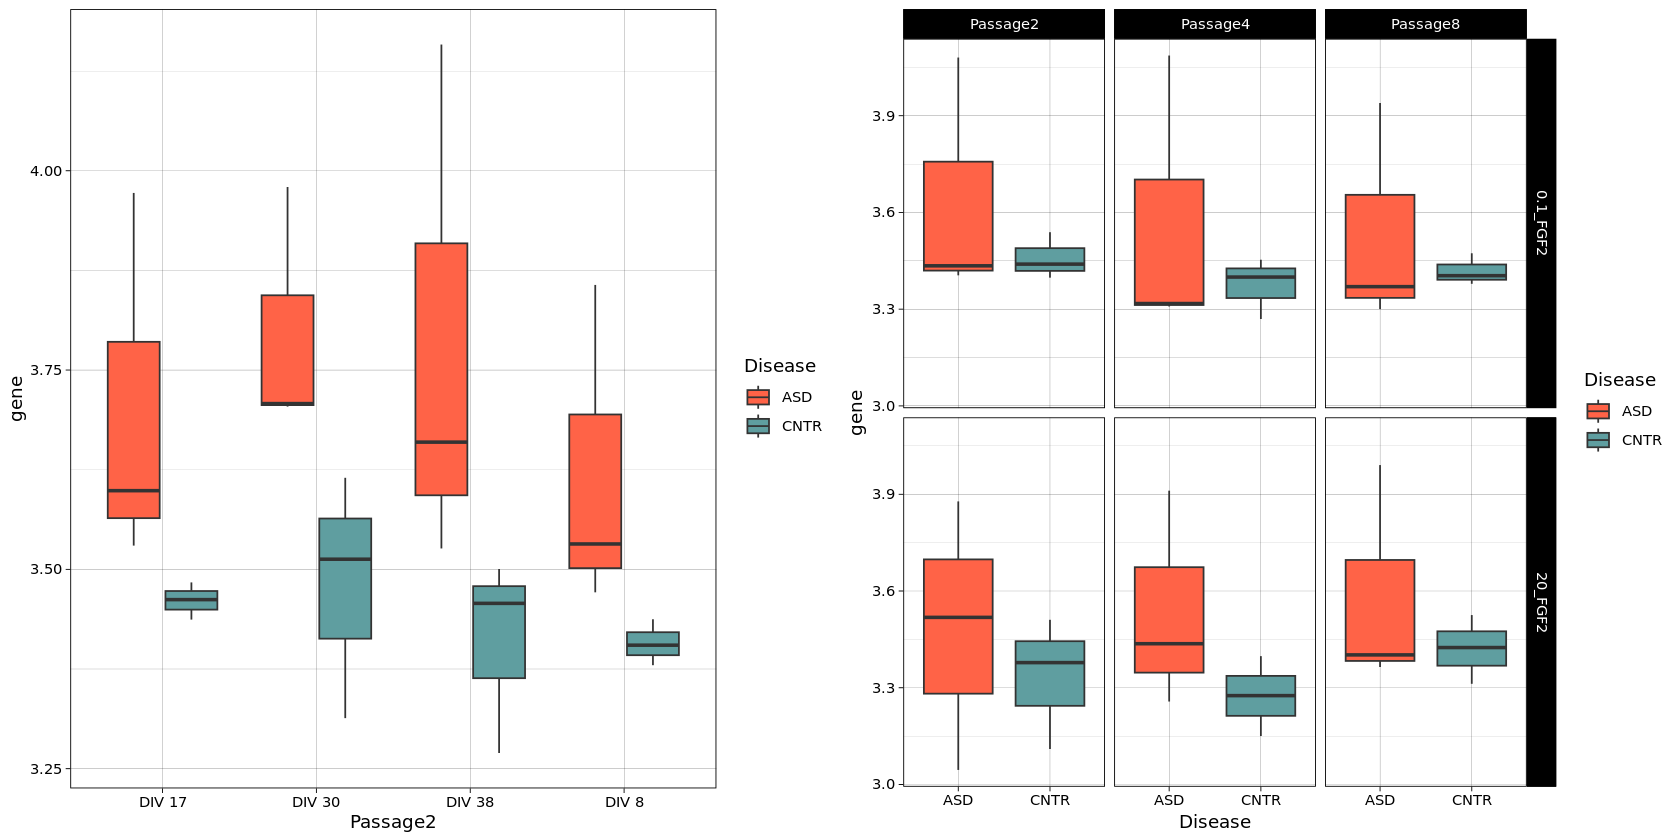

In [35]:
options(repr.plot.height=7, repr.plot.width=14)
plotGene("ENSG00000147316")

